<a href="https://colab.research.google.com/github/kameshcodes/deep-learning-codes/blob/main/pytorch_basics_datasets_dataloader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

import pandas as pd

In [ ]:
csv_path = "/content/sample_data/california_housing_train.csv"
df = pd.read_csv(csv_path)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


- All columns are in numerical $\rightarrow$ easier to load, no transformation is needed.

### **1.1 Loading the CSV data in pytorch**

In [ ]:
class HousingDataset(Dataset):
  def __init__(self, csv_path):
    df = pd.read_csv(csv_path)
    self.X = torch.tensor(df.iloc[:, :-1].values, dtype = torch.float16)
    self.y = torch.tensor(df.iloc[:, -1].values, dtype = torch.float32)

  def __len__(self):
    return len(self.X)

  def __getitem__(self, idx):
    return self.X[idx], self.y[idx]

In [ ]:
dataset = HousingDataset(csv_path)
dataloader = DataLoader(dataset, batch_size= 4, shuffle=True)

next(iter(dataloader))

[tensor([[-122.2500,   37.7812,   52.0000, 1704.0000,  371.0000,  663.0000,
           340.0000,    4.2266],
         [-121.8125,   38.0000,   47.0000, 1265.0000,  254.0000,  587.0000,
           247.0000,    2.6367],
         [-122.2500,   37.8750,   52.0000, 2256.0000,  410.0000,  823.0000,
           377.0000,    5.7969],
         [-120.7500,   38.5625,    8.0000,  892.0000,  185.0000,  427.0000,
           164.0000,    2.6836]], dtype=torch.float16),
 tensor([275000.,  93500., 415300., 118800.])]

### **1.1.1 Scaling the data with loading**

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
class HousingDataset2(Dataset):
  def __init__(self, csv_path, scaler):
    df = pd.read_csv(csv_path)
    df = pd.read_csv(csv_path)
    self.X = df.iloc[:, :-1].values
    self.y = df.iloc[:, -1].values

    if scaler:
      self.X = scaler.fit_transform(self.X)

    self.X = torch.tensor(self.X, dtype=torch.float32)
    self.y = torch.tensor(self.y, dtype=torch.float32) #float16 here will give inf. why ? because number are big to be represented as 16 bit floaat

  def __len__(self):
    return len(self.X)

  def __getitem__(self, idx):
    return self.X[idx], self.y[idx]

In [ ]:
# scaler = StandardScaler()
scaler = MinMaxScaler()
dataset = HousingDataset2(csv_path, scaler)
dataloader = DataLoader(dataset, batch_size= 4, shuffle=True)

next(iter(dataloader))

[tensor([[0.7012, 0.1923, 0.1569, 0.0633, 0.0604, 0.0300, 0.0589, 0.3117],
         [0.1594, 0.6334, 0.2941, 0.1106, 0.0989, 0.0479, 0.1010, 0.3413],
         [0.1912, 0.5409, 0.6471, 0.1089, 0.1065, 0.0603, 0.1219, 0.3085],
         [0.7311, 0.0329, 0.4314, 0.0683, 0.0641, 0.0392, 0.0707, 0.3442]]),
 tensor([151900., 252100., 342300., 151400.], dtype=torch.float64)]

**Note:** Do all the dataframe operations inside $\text{__init__}$ method or and if it is heavy processing consder doing it outside the class.

## **2. Load image data in pytorch**

In [4]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets, transforms

from PIL import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

Let us define a custom transform transform. Although we can use some inbuilt transform given by the pytorch. Nevertheless.

In [5]:
transform = transforms.Compose(
    [
        transforms.Resize((128, 128)),
        transforms.CenterCrop(120),
        transforms.ToTensor(),
    ]
)

In [43]:
class PokemonImageDataset(Dataset):
  def __init__(self, csv_path, img_dir, transform=None):
    self.img_dir = img_dir
    self.transform = transform
    self.df = pd.read_csv(csv_path)

  def __len__(self):
    return len(self.df)

  def __getitem__(self, idx):
    img_name = self.df.iloc[idx, 0]
    img_path = os.path.join(self.img_dir, img_name) + ".png"
    img = Image.open(img_path)
    label = self.df.iloc[idx, 1]
    if self.transform:
      img = self.transform(img)
    return img, img_name, label

In [38]:
img_dir = "/content/images"
csv_path = "/content/pokemon.csv"

In [54]:
dataset = PokemonImageDataset(csv_path, img_dir, transform=transform)
dataloader = DataLoader(dataset, batch_size = 8, shuffle = True)

In [55]:
for images, img_names, labels in dataloader:
  print(f"Image shape: {images.shape}")
  print(f"Image type: {type(images)}")

  print(f"\nImage name: {img_names}")
  print(f"Image name type: {type(img_names)}")


  print(f"\nLabels: {labels}")
  print(f"Label type: {type(labels)}")

  print(f'\nbatch_size: {images.size(0)}')
  break

Image shape: torch.Size([8, 4, 120, 120])
Image type: <class 'torch.Tensor'>

Image name: ('charizard', 'kommo-o', 'eevee', 'vullaby', 'sawk', 'doublade', 'shellder', 'komala')
Image name type: <class 'tuple'>

Labels: ('Fire', 'Dragon', 'Normal', 'Dark', 'Fighting', 'Steel', 'Water', 'Normal')
Label type: <class 'tuple'>

batch_size: 8


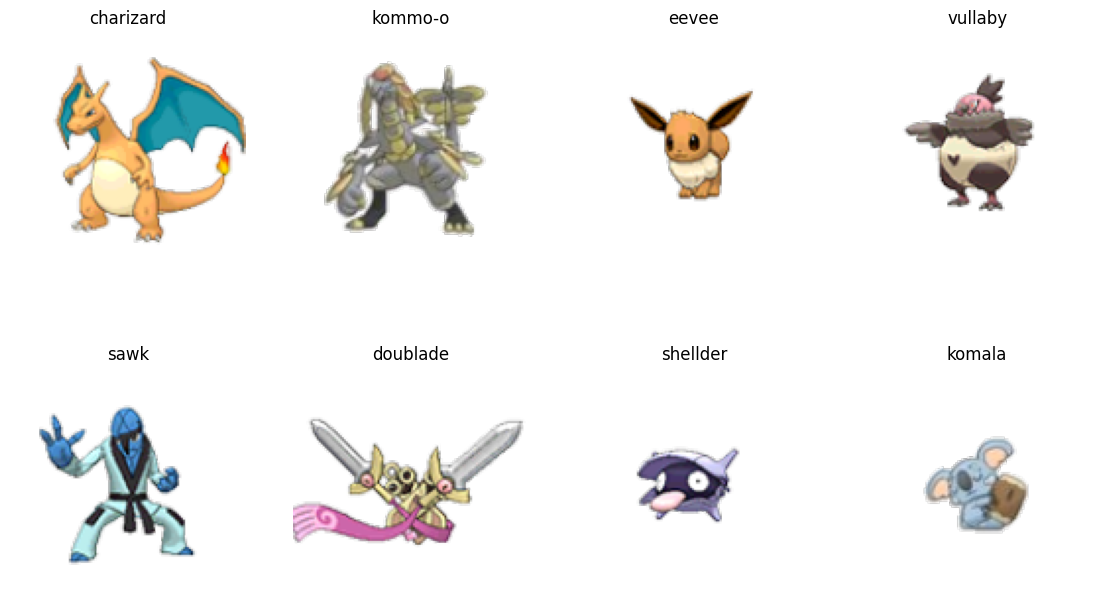

In [57]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
for i in range(len(images)):
    plt.subplot(len(images)//4, 4, i+1)   #no of row, no of cols, img num
    plt.imshow(images[i].permute(1, 2, 0))
    plt.title(img_names[i])
    plt.axis("off")
plt.show()

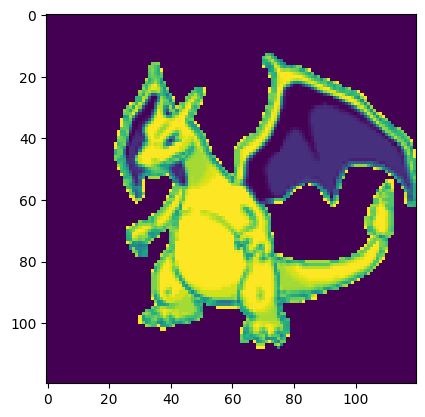

In [86]:
plt.imshow(images[0][0])
plt.show()

In [87]:
images[0].shape

torch.Size([4, 120, 120])